In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# with open('PartD_Prescriber_PUF_NPI_17/PartD_Prescriber_PUF_NPI_17.txt') as f:
#     z = f.readline()
df = pd.read_csv('PartD_Prescriber_PUF_NPI_17/PartD_Prescriber_PUF_NPI_17.txt', sep = '\t')
df.columns

Index(['npi', 'nppes_provider_last_org_name', 'nppes_provider_first_name',
       'nppes_provider_mi', 'nppes_credentials', 'nppes_provider_gender',
       'nppes_entity_code', 'nppes_provider_street1', 'nppes_provider_street2',
       'nppes_provider_city', 'nppes_provider_zip5', 'nppes_provider_zip4',
       'nppes_provider_state', 'nppes_provider_country',
       'specialty_description', 'description_flag',
       'medicare_prvdr_enroll_status', 'total_claim_count',
       'total_30_day_fill_count', 'total_drug_cost', 'total_day_supply',
       'bene_count', 'ge65_suppress_flag', 'total_claim_count_ge65',
       'total_30_day_fill_count_ge65', 'total_drug_cost_ge65',
       'total_day_supply_ge65', 'bene_count_ge65_suppress_flag',
       'bene_count_ge65', 'brand_suppress_flag', 'brand_claim_count',
       'brand_drug_cost', 'generic_suppress_flag', 'generic_claim_count',
       'generic_drug_cost', 'other_suppress_flag', 'other_claim_count',
       'other_drug_cost', 'mapd_suppress

In [4]:
df.head()

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,...,beneficiary_male_count,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_average_risk_score
0,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,92.0,220.0,14.0,0.0,0.0,0.0,0.0,143.0,91.0,2.1685
1,1003000142,KHALIL,RASHID,NaN,M.D.,M,I,4126 N HOLLAND SYLVANIA RD,SUITE 220,TOLEDO,...,92.0,195.0,58.0,NaN,NaN,0.0,NaN,143.0,133.0,1.8029
2,1003000167,ESCOBAR,JULIO,E,DDS,M,I,5 PINE CONE RD,NaN,DAYTON,...,17.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,1.0598
3,1003000175,REYES-VASQUEZ,BELINDA,NaN,D.D.S.,F,I,322 N AZUSA AVE STE 202,NaN,LA PUENTE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1003000282,BLAKEMORE,ROSIE,K,FNP,F,I,TENNESSEE PRISON FOR WOMEN,3881 STEWARTS LANE,NASHVILLE,...,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,4.5148


*In 2017, what was the average number of beneficiaries per provider? Due to the suppression of data for those with few beneficiaries, we can only include those with more than 10 beneficiaries. *

In [5]:
len(df['npi'].unique()) == len(df.index) # Verifying that all npi are unique
# df.set_index('npi')


True

C:\Users\way\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


Text(0.5, 1.0, 'Beneficiary Counts per NPI')

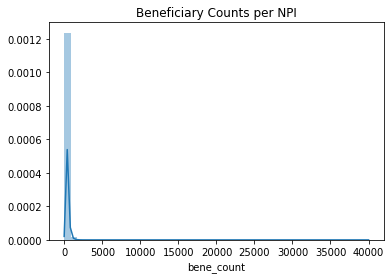

In [6]:
sns.distplot(df['bene_count'].dropna()).set_title('Beneficiary Counts per NPI')

Seems a bit strange that a provider would be able to see and perscribe 40,000 patients in this time frame (1 year?). Additional research indicates NPI numbers can be granted to organizations as well as individual physicians, so this is probably fine. The mean beneficiaries per provider is below.


In [7]:
sum(df.bene_count.notna())

1031058

In [8]:
mean_bene = df['bene_count'].dropna().mean() # Entries with fewer than 10 beneficiaries were left blank
suppressed = sum(df['bene_count'].isna())
print(f'{mean_bene} is the average beneficiaries per provider, with {suppressed} providers not included due to <10 beneficiaries')

158.3494585173676 is the average beneficiaries per provider, with 131840 providers not included due to <10 beneficiaries


*Work out for each Specialty the fraction of drug claims that are for brand-name drugs. Include only providers for whom the relevant information has not been suppressed, and consider only specialties with at least 1000 total claims. What is the standard deviation of these fractions? *

find specialties that have 1000 total claims (sum on specialties + bene counts), dropping na
use specialties with enough claims to look at generic vs brand name
'brand_claim_count'
'generic_claim_count' 
summed together give the total, but each can be suppressed as well. how to deal with this? will drop na values from here

In [9]:
specs = df.groupby('specialty_description')
s = df.specialty_description.unique()
idx =  (specs['bene_count'].sum()>=1000)
z = s[idx].tolist() # This is the list of specialties with 1000 claims or more

brand_frac = []

for specialty in z:
    gen = specs.get_group(specialty)['generic_claim_count'].dropna().sum()
    brand = specs.get_group(specialty)['brand_claim_count'].dropna().sum()
    bf = brand/(gen+brand)
    brand_frac.append(brand / (gen + brand))
    
sdf = pd.DataFrame(brand_frac,index = z, columns = ['brand fraction'])
print(f'''\tThe std dev of the fractions is: {sdf['brand fraction'].dropna().std()}
        Note that there were 9 specialties where either generic or brand information was suppresed. 
        These values were excluded''')

	The std dev of the fractions is: 0.10484019785758457
        Note that there were 9 specialties where either generic or brand information was suppresed. 
        These values were excluded


C:\Users\way\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
C:\Users\way\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


*Let's find which states have surprisingly high supply of opioids, conditioned on specialty. Work out the average length of an opioid prescription for each provider. For each (state, specialty) pair with at least 100 providers, calculate the average of this value across all providers. Then find the ratio of this value to an equivalent quantity calculated from providers in each specialty across all states. What is the largest such ratio? *


In [10]:
# First, identify opioid prescription length note that there are 2 types of opioids prescribed (long acting & normal)
df['total_op'] = df['opioid_day_supply'] + df['la_opioid_day_supply']
df['avg_op'] = ((df['opioid_day_supply'] + df['la_opioid_day_supply'] ) / 2).dropna()

In [11]:
# Group into state, specialty pairs and find the combinations with greater than 100 entries
spec_state_pairs = df.groupby(['specialty_description', 'nppes_provider_state'])
spec_state_size = spec_state_pairs.size()
ssp = np.where(spec_state_size >=100)[0]

# Create an array of the pairs to iterate over to calculate the average across all providers possibly unneeded
combo_100 = spec_state_size.iloc[ssp].index

# Use z for convenience
z = pd.DataFrame(spec_state_size[ssp], columns = ['num providers'])
z['pair_spec_ratio'] = np.zeros(len(z))

curr_spec = []
curr_spec_avg = 0
for item in combo_100:
    state = item[1]
    #avoid multiple calculations for same specialty average
    if item[0] != curr_spec:
        curr_spec = item[0]
        curr_spec_avg = df.groupby('specialty_description').get_group(curr_spec)['avg_op'].dropna().mean()
        # print(f'{curr_spec} average is: {curr_spec_avg}')
    #calculate the mean for the pair, then divide by the specialty average across all states
    z.loc[(curr_spec, state),'pair_spec_ratio'] = spec_state_pairs.get_group((curr_spec,state))['avg_op'].dropna().mean()/curr_spec_avg

Let's see which specialty/state combination has the highest ratio, indicating a pair that perscribes far more than the average for that specialty.

In [12]:
z.iloc[np.where(z['pair_spec_ratio'] == z['pair_spec_ratio'].max())]['pair_spec_ratio']

specialty_description  nppes_provider_state
Optometry              LA                      59.429756
Name: pair_spec_ratio, dtype: float64

In [13]:
z.describe()

,num providers,pair_spec_ratio
count,1321.000000,1321.000000
mean,823.216503,1.083517
std,1485.035366,1.901928
min,100.000000,0.000000
25%,168.000000,0.499616
50%,313.000000,0.852237
75%,762.000000,1.317444
max,17135.000000,59.429756


*For each provider, estimate the length of the average prescription from the total_day_supply and total_claim_count. What is the median, in days, of the distribution of this value across all providers? *

In [14]:
df['prescrip_len_avg'] = df['total_day_supply'] / df['total_claim_count']
sum(df['prescrip_len_avg'].isna()) # interestingly, no NaN values here
('The median of the average perscription length is: {df[\'prescrip_len_avg\'].median()} days.')

"The median of the average perscription length is: {df['prescrip_len_avg'].median()} days."

*Find the ratio of beneficiaries with opioid prescriptions to beneficiaries with antibiotics prescriptions in each state. Assume that each beneficiary attends only a single provider. What is the difference between the largest and smallest ratios?*

In [15]:
state_sum_df = df.groupby('nppes_provider_state').sum()
state_sum_df['opab ratio'] = (state_sum_df['la_opioid_bene_count'] + state_sum_df['opioid_bene_count']) / \
                                state_sum_df['antibiotic_bene_count']
maximum = state_sum_df['opab ratio'].max()
minumum = state_sum_df['opab ratio'].min()
print(f' The difference between largest and smallest ratio of opioid to antibiotic prescriptions per state is \
      {maximum - minumum}.')

 The difference between largest and smallest ratio of opioid to antibiotic prescriptions per state is       0.6875792506621659.


*For each provider where the relevant columns are not suppressed, work out the fraction of claims for beneficiaries age 65 and older, as well as the fraction of claims for beneficiaries with a low-income subsidy. What is the Pearson correlation coefficient between these values? *

Text(0, 0.5, 'prop LIS')

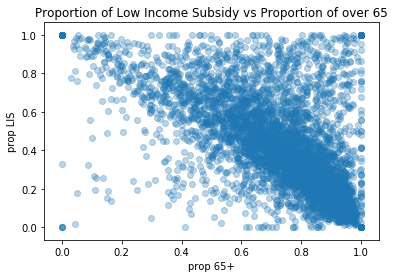

In [16]:
df['claim_65_prop'] = df['total_claim_count_ge65'] / df['total_claim_count']
df['claim_LIS_prop'] = df['lis_claim_count'] / df['total_claim_count']
pc_df = df.loc[:,['claim_65_prop','claim_LIS_prop']].dropna()

# Visualize using a plot of a sample of the values
data=pc_df.sample(5000)
plt.scatter(data['claim_65_prop'], data['claim_LIS_prop'], alpha=0.3)
plt.title('Proportion of Low Income Subsidy vs Proportion of over 65')
plt.xlabel('prop 65+')
plt.ylabel('prop LIS')

This plot seems to show a linear, inverse relationship between the proportions of over 65 when compared to low income. This suggests that the higher the proportion of elderly beneficiaries a provider has, the lower the proportion of LIS beneficiaries. This is also reflected in the Pearson Correlation coefficient, below.


In [17]:
# Use corr method to calculate P.C. retrieve the value corresponding to the P.C. between the variables of interest 
print(f' The correlation coefficient between low-income and over 65 beneficiaries is : {pc_df.corr().iloc[0,1]}')

 The correlation coefficient between low-income and over 65 beneficiaries is : -0.638931959567174


*For each provider for whom the information is not suppressed, figure out the average cost per day of prescriptions in both 2016 and 2017. Use this to estimate the inflation rate for daily prescription costs per provider. What is the average inflation rate across all providers? *

In [18]:
# going to have to make use of the 'join' function to join the information that we want from both things
df16 = pd.read_csv('PartD_Prescriber_PUF_NPI_16/PartD_Prescriber_PUF_NPI_16.txt', sep='\t')


In [19]:
df_inf = df16.set_index('npi').loc[:,['total_drug_cost', 'total_day_supply']].join(
            df.set_index('npi').loc[:,['total_drug_cost', 'total_day_supply']], lsuffix='_16', rsuffix='_17')
df_inf.dropna(inplace=True)
df_inf.head()

,total_drug_cost_16,total_day_supply_16,total_drug_cost_17,total_day_supply_17
npi,,,,
1003000126,33618.18,12120,32639.57,14788.0
1003000142,139695.81,51314,140189.01,58605.0
1003000167,267.81,509,302.01,430.0
1003000282,4587.11,5939,7561.21,2681.0
1003000407,112183.11,45674,108601.73,50677.0


In [20]:
# The average daily cost is the drug_cost/day_supply
# The average for all providers is the sum of costs/sum of day supply
# The inflation rate from 2016 to 2017 is the proportional increase in avg cost from 2016 to 2017
avg_2016 = df_inf['total_drug_cost_16'].sum() / df_inf['total_day_supply_16'].sum()
avg_2017 = df_inf['total_drug_cost_17'].sum() / df_inf['total_day_supply_17'].sum()
inf_rate = (avg_2017/avg_2016-1)*100
print(f'The inflation rate, typically given as a percent, is: {inf_rate}')

The inflation rate, typically given as a percent, is: 1.438518583923365


*Consider all providers with a defined specialty in both years. Find the fraction of providers who left each specialty between 2016 and 2017. What is the largest such fraction, when considering specialties with at least 1000 proviers in 2016? Note that some specialties have a fraction of 1 due to specialty name changes between 2016 and 2017; disregard these specialties in calculating your answer. *

In [21]:
# Join df columns with specialty info together, dropping providers who don't have info in both years
df_specs = df16.set_index('npi').join(
            df.set_index('npi').loc[:,'specialty_description'], lsuffix='_16', rsuffix='_17')
df_specs = df_specs.loc[:, ['specialty_description_16', 'specialty_description_17']].dropna()


In [22]:
# Compare specialties from different years
df_specs.loc[:,'changed specialty'] = (df_specs['specialty_description_16'] != df_specs['specialty_description_17'])

# Create dataframe with the counts of each specialty
temp_spec_counts = df_specs['specialty_description_16'].value_counts().to_frame(name='spec_count_16')
temp_spec_counts.index.rename('specialty_description_16', inplace=True)

# Join the dataframe with the total number of providers in each specialty who changed between 2016 and 2017
spec_compare_df = df_specs.groupby('specialty_description_16').sum().join(temp_spec_counts)


In [23]:
# For specialties with >1000 providers, calculate the fraction that changed, and find the largest non-1 value
# This is the indices where spec count is >1000, AND #changed_specialty is NOT EQUAL to the count_16 
idx  = np.where((spec_compare_df['spec_count_16'] >= 1000))

sc = spec_compare_df.iloc[idx]

# The series storing the fraction of changed specialties per specialty with >1000 providers
sc['frac'] = sc['changed specialty'] / sc['spec_count_16']

maximum = sc['frac'].iloc[np.where(sc['frac'] < 1)].max()
max_spec = sc.iloc[np.where(sc['frac']==maximum)].index[0]
print(f'The specialty with the highest fraction of specialty changes not due to name changes is {max_spec} at {maximum}')

The specialty with the highest fraction of specialty changes not due to name changes is Student in an Organized Health Care Education/Training Program at 0.29020886577950117


C:\Users\way\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56]), <a list of 57 Text xticklabel objects>)

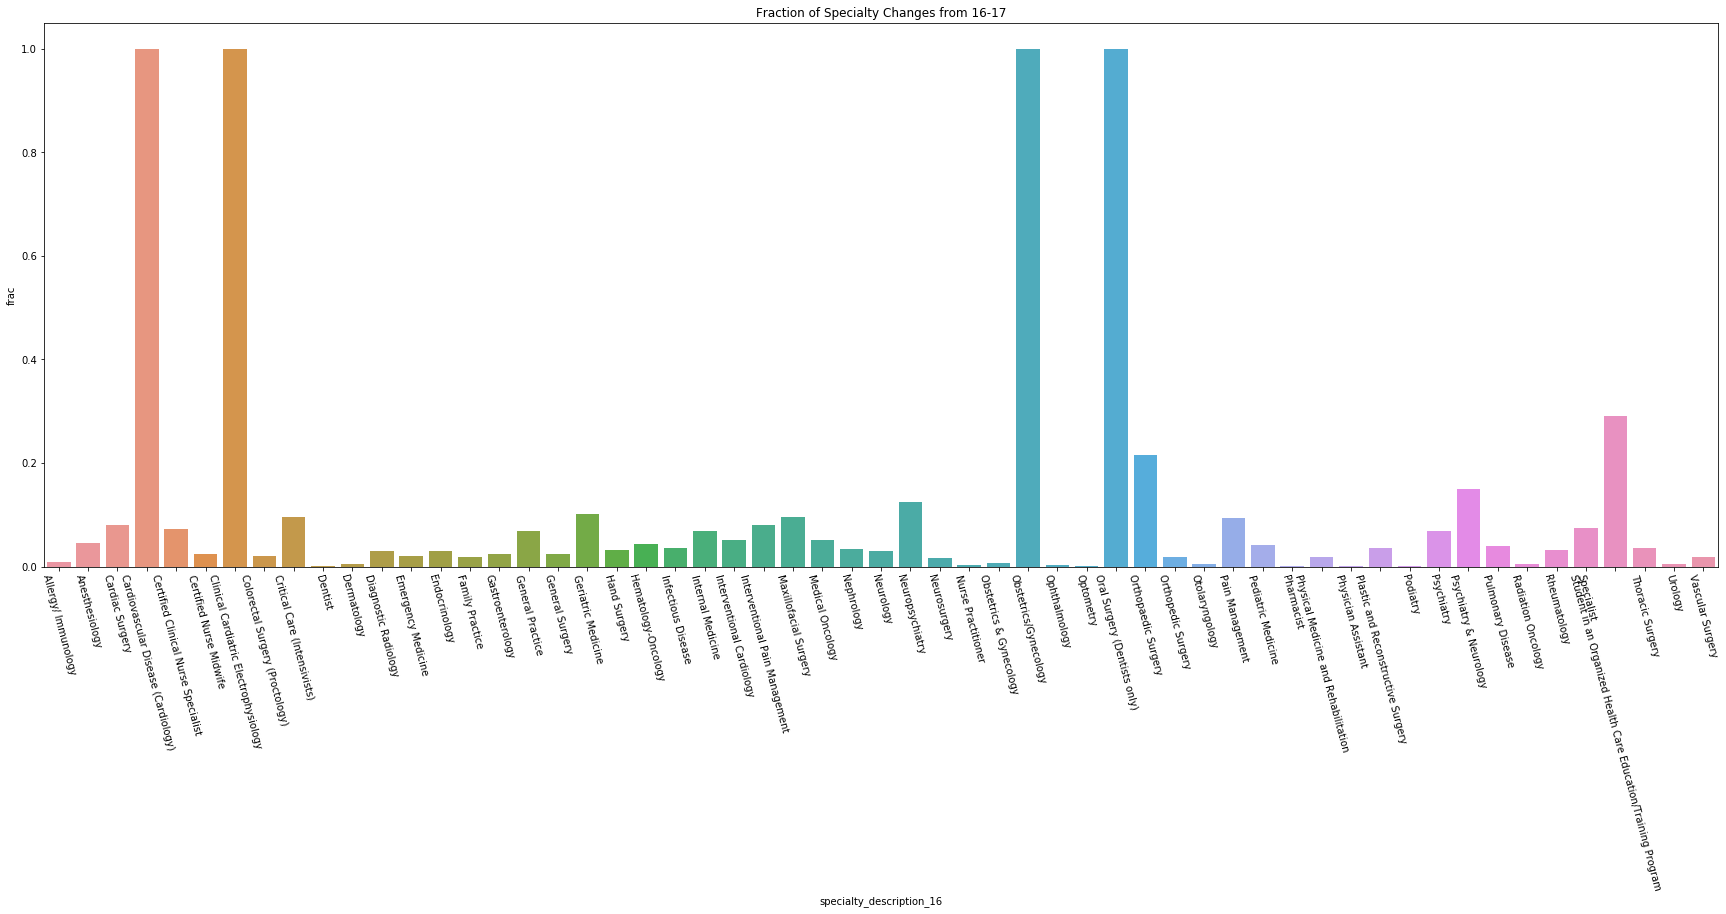

In [24]:
#Plot of fractions, though the xlabels may not be rendering quite correctly
plt.figure(figsize=(30,10))
sns.barplot(data=sc, x=sc.index, y='frac').set_title('Fraction of Specialty Changes from 16-17')
plt.xticks(rotation = -75)



In [25]:
sc.iloc[np.where(sc['frac']==maximum)].index[0]

'Student in an Organized Health Care Education/Training Program'